> This project explores publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). This project aims to create a model to show profiles of borrowers with a high probability of paying back this loan. 
> The columns in the dataset represent the following:
> * credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
> * purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
> * int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
> * installment: The monthly installments owed by the borrower if the loan is funded.
> * log.annual.inc: The natural log of the self-reported annual income of the borrower.
> * dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
> * fico: The FICO credit score of the borrower.
> * days.with.cr.line: The number of days the borrower has had a credit line.
> * revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
> * revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
> * inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
> * delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
> * pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loans = pd.read_csv("../input/loan_data.csv")
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5,0,'FICO')

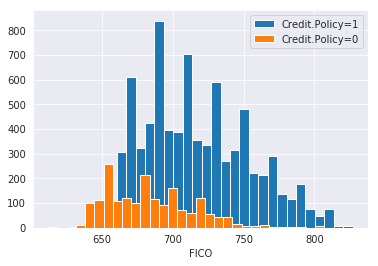

In [5]:
sns.set_style('darkgrid')
plt.hist(loans['fico'].loc[loans['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(loans['fico'].loc[loans['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')


Text(0.5,0,'FICO')

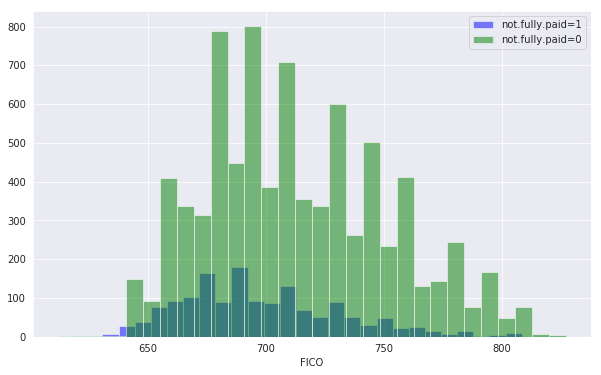

In [6]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

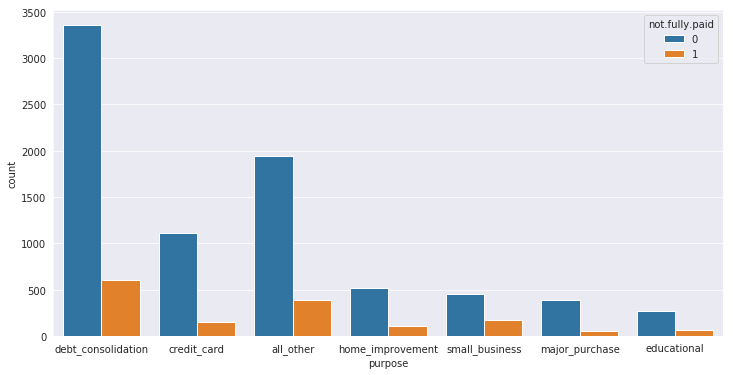

In [7]:

#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x432 with 0 Axes>

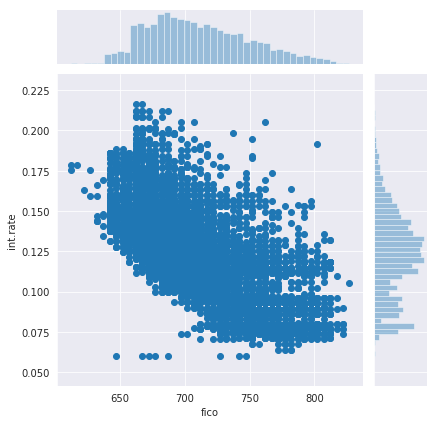

In [8]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=loans)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


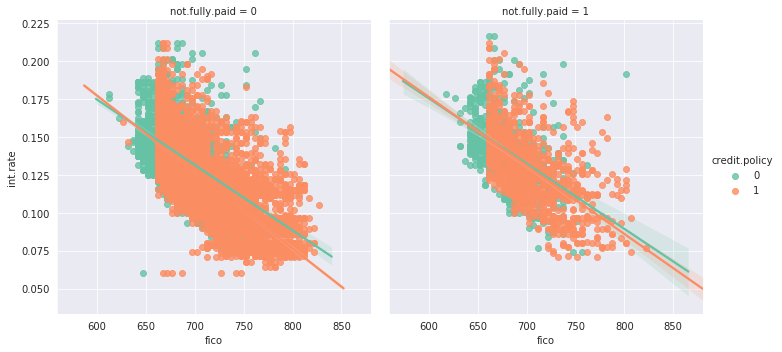

In [9]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
#handling categorical variable purpose
purpose_c = pd.get_dummies(loans['purpose'], drop_first=True)
loans_f = pd.concat([loans, purpose_c], axis=1).drop('purpose', axis=1)
loans_f.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


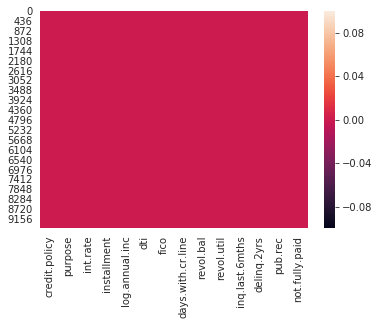

In [12]:
#checking for null values
sns.heatmap(loans.isnull())

In [13]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split
y = loans_f['not.fully.paid'] 
X = loans_f.drop('not.fully.paid', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [14]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

#checking performance of the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1979  409]
 [ 369  117]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2388
           1       0.22      0.24      0.23       486

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.73      2874



In [15]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
predictionRF = rfc.predict(X_test)

#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))


[[2378   10]
 [ 478    8]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2388
           1       0.44      0.02      0.03       486

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.77      0.83      0.76      2874



Conclusion:
If precision (TP/(TP+FP)) or the total number of correct classifications is considered to be the determining factor, then decision tree algorithm did as well as random forests for class 0.
If recall (TP/(TP+FN)) or the total number of true positives is considered to be the determining factor, then random forests did better than decision trees for class 0.
For class 1, random forests gave recall of only 0.01, whereas for decision tree it was 0.24. Neither of the models did too well for class 1. However, decision trees did slightly better for class 1.